In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# DECISION TREES

In [2]:
data = pd.read_csv("D:\data-analytics\Social_Network_Ads.csv")
data.drop(columns=["User ID","Gender"], inplace = True)
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
data.value_counts

<bound method DataFrame.value_counts of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [5]:
x=data.iloc[:,:-1]
y=data["Purchased"]

In [6]:
x.shape

(400, 2)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [9]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [10]:
x_train.shape , y_train.shape

((320, 2), (320,))

In [11]:
from sklearn.tree import DecisionTreeClassifier #yhan isske do type hote hai , ek decisontree classifier and decision tree regressor
dt = DecisionTreeClassifier() #by default issme gini index ke base me decision tree bana hai
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
dt.score(x_test,y_test) #83% accurate

0.8375

In [13]:
dt.predict([[35,20000]]) #utne acche tareeke se predict nahi kar paa rha h, galat answer de rha h kuch values ka

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

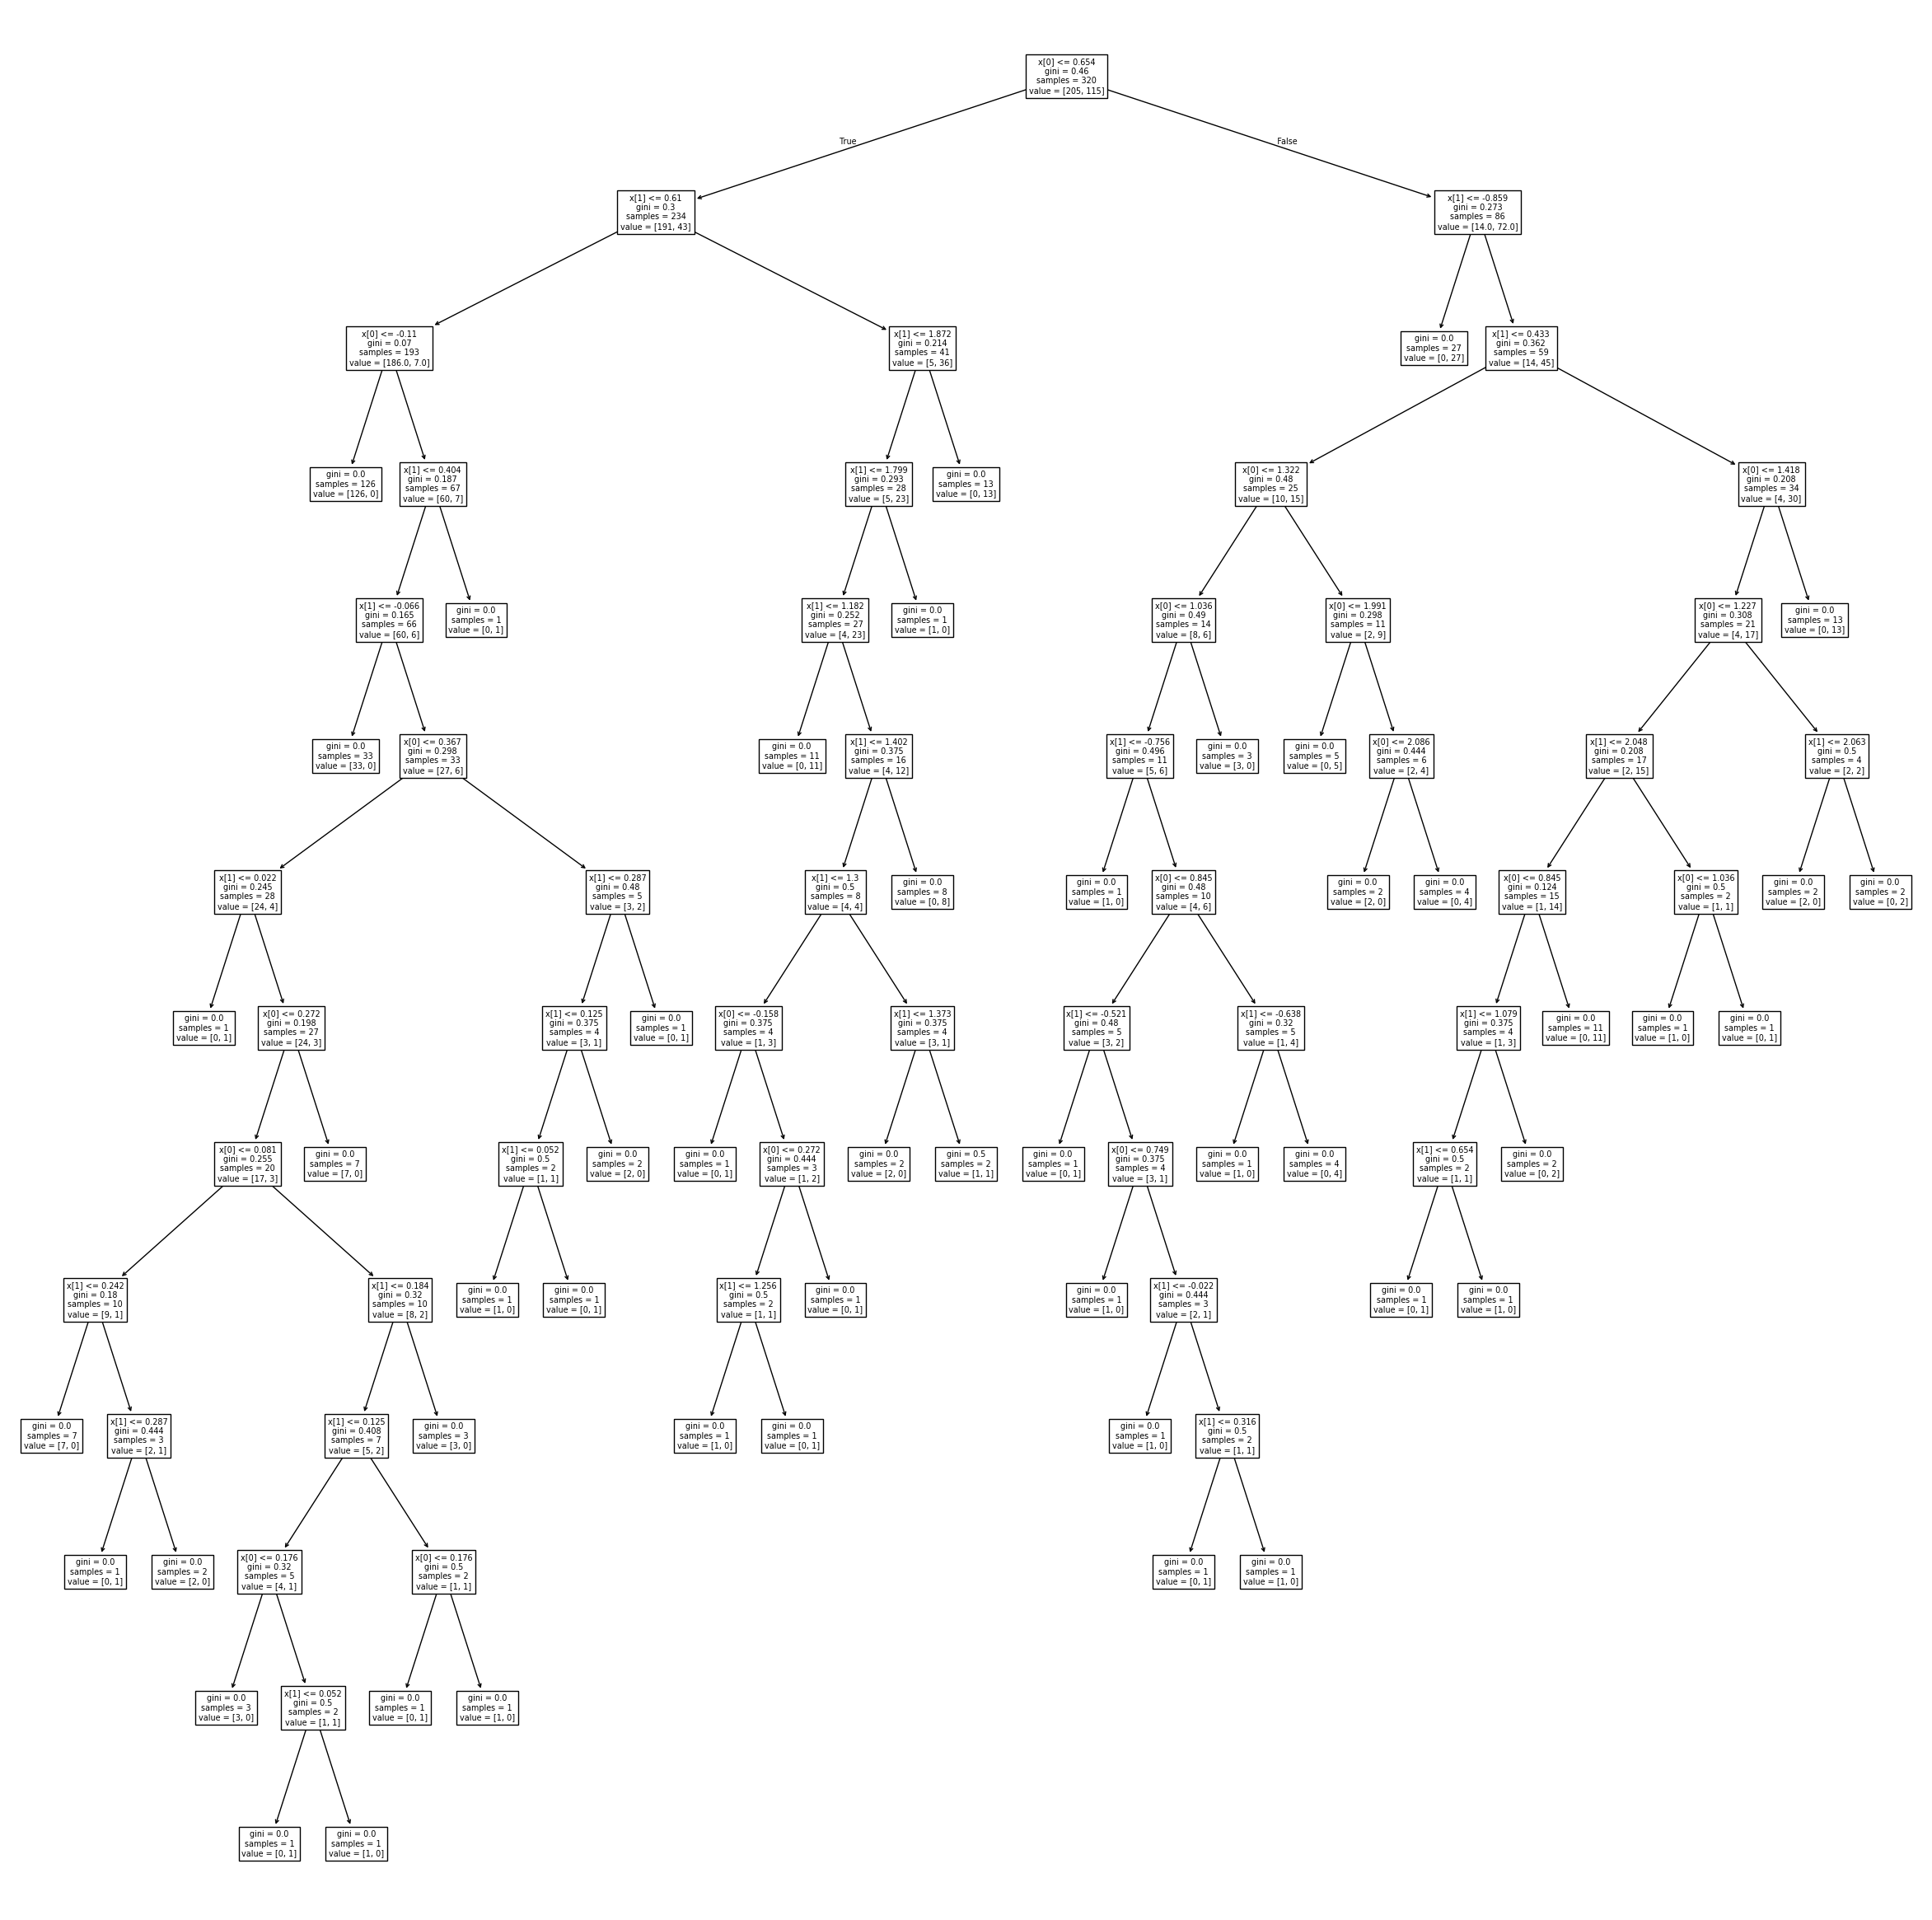

In [14]:
plt.figure(figsize=(30,30))
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

In [15]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

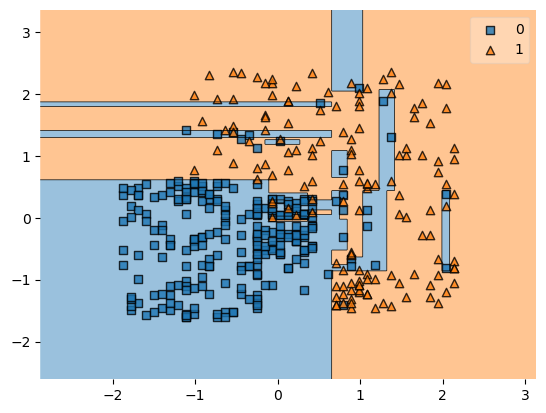

In [16]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt) #yahan pr ek koi linear line nahi banegi, yahn pr regions me divide horha hai sare age and estimated value par kuch kuch triangel and square ek dusre me interfare kr parhe hai

In [17]:
#x ke ander do values thi, age=> x[0] and estimated salary => x[1], issme sabse pahle hm dekhe toh x[0] ko liya hai yaani age ko , jiski entropy ya gini index kam rahi hoge x[1] ke comparision me , aur yhan 320 samples par work kiya gaya hai, mtlb ki usme se 205 ek values honge and 115 ek values honge

In [18]:
#ab hum entropy ke base me banayenge
from sklearn.tree import DecisionTreeClassifier #yhan isske do type hote hai , ek decisontree classifier and decision tree regressor
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
dt1.score(x_test,y_test) #83% accurate => jyda kuch difference nahi hai gini index se

0.8375

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

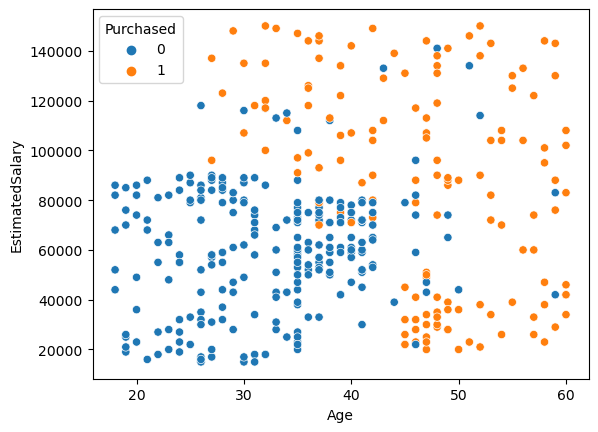

In [20]:
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased",data=data) #data ke graph ko dekhkr pata lagrha hai ki issme data , non-linearly split hoga, kyuki kuch kuch data aaps me interfare krr rhe hai

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

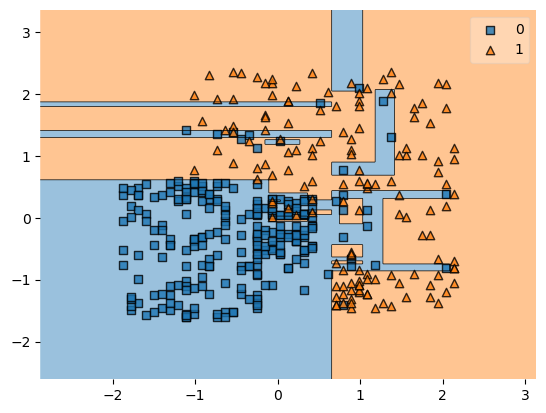

In [21]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt1) #yeh bhi same hi work kr rha hai

# PRUNING

#PRE-PRUNING

In [22]:
from sklearn.tree import DecisionTreeClassifier #yhan isske do type hote hai , ek decisontree classifier and decision tree regressor
dt1 = DecisionTreeClassifier(max_depth=5) #issme max_depth ka use krke hum pruning kr skte hai, issme 5 height tk ke hi tree banege
#yhan hmne pahle hi pruning kr di aur tree ko kaat diya hai
dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
dt1.score(x_test,y_test) #90% accurate

0.9

In [24]:
dt1.score(x_train,y_train) #93%

0.934375

In [25]:
dt1.predict([[35,20000]]) #utne acche tareeke se predict nahi kar paa rha h, galat answer de rha h kuch values ka

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

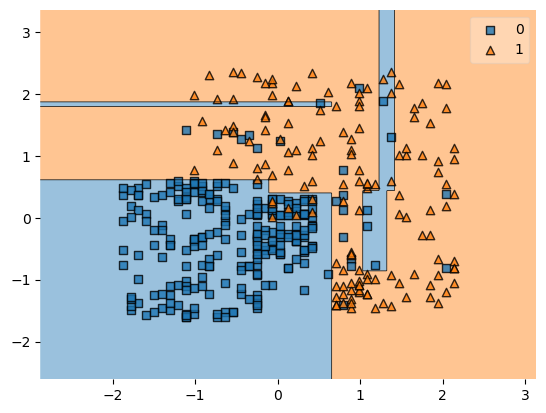

In [26]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt1) #yahan pr ek koi linear line nahi banegi, yahn pr regions me divide horha hai sare age and estimated value par kuch kuch triangel and square ek dusre me interfare kr parhe hai

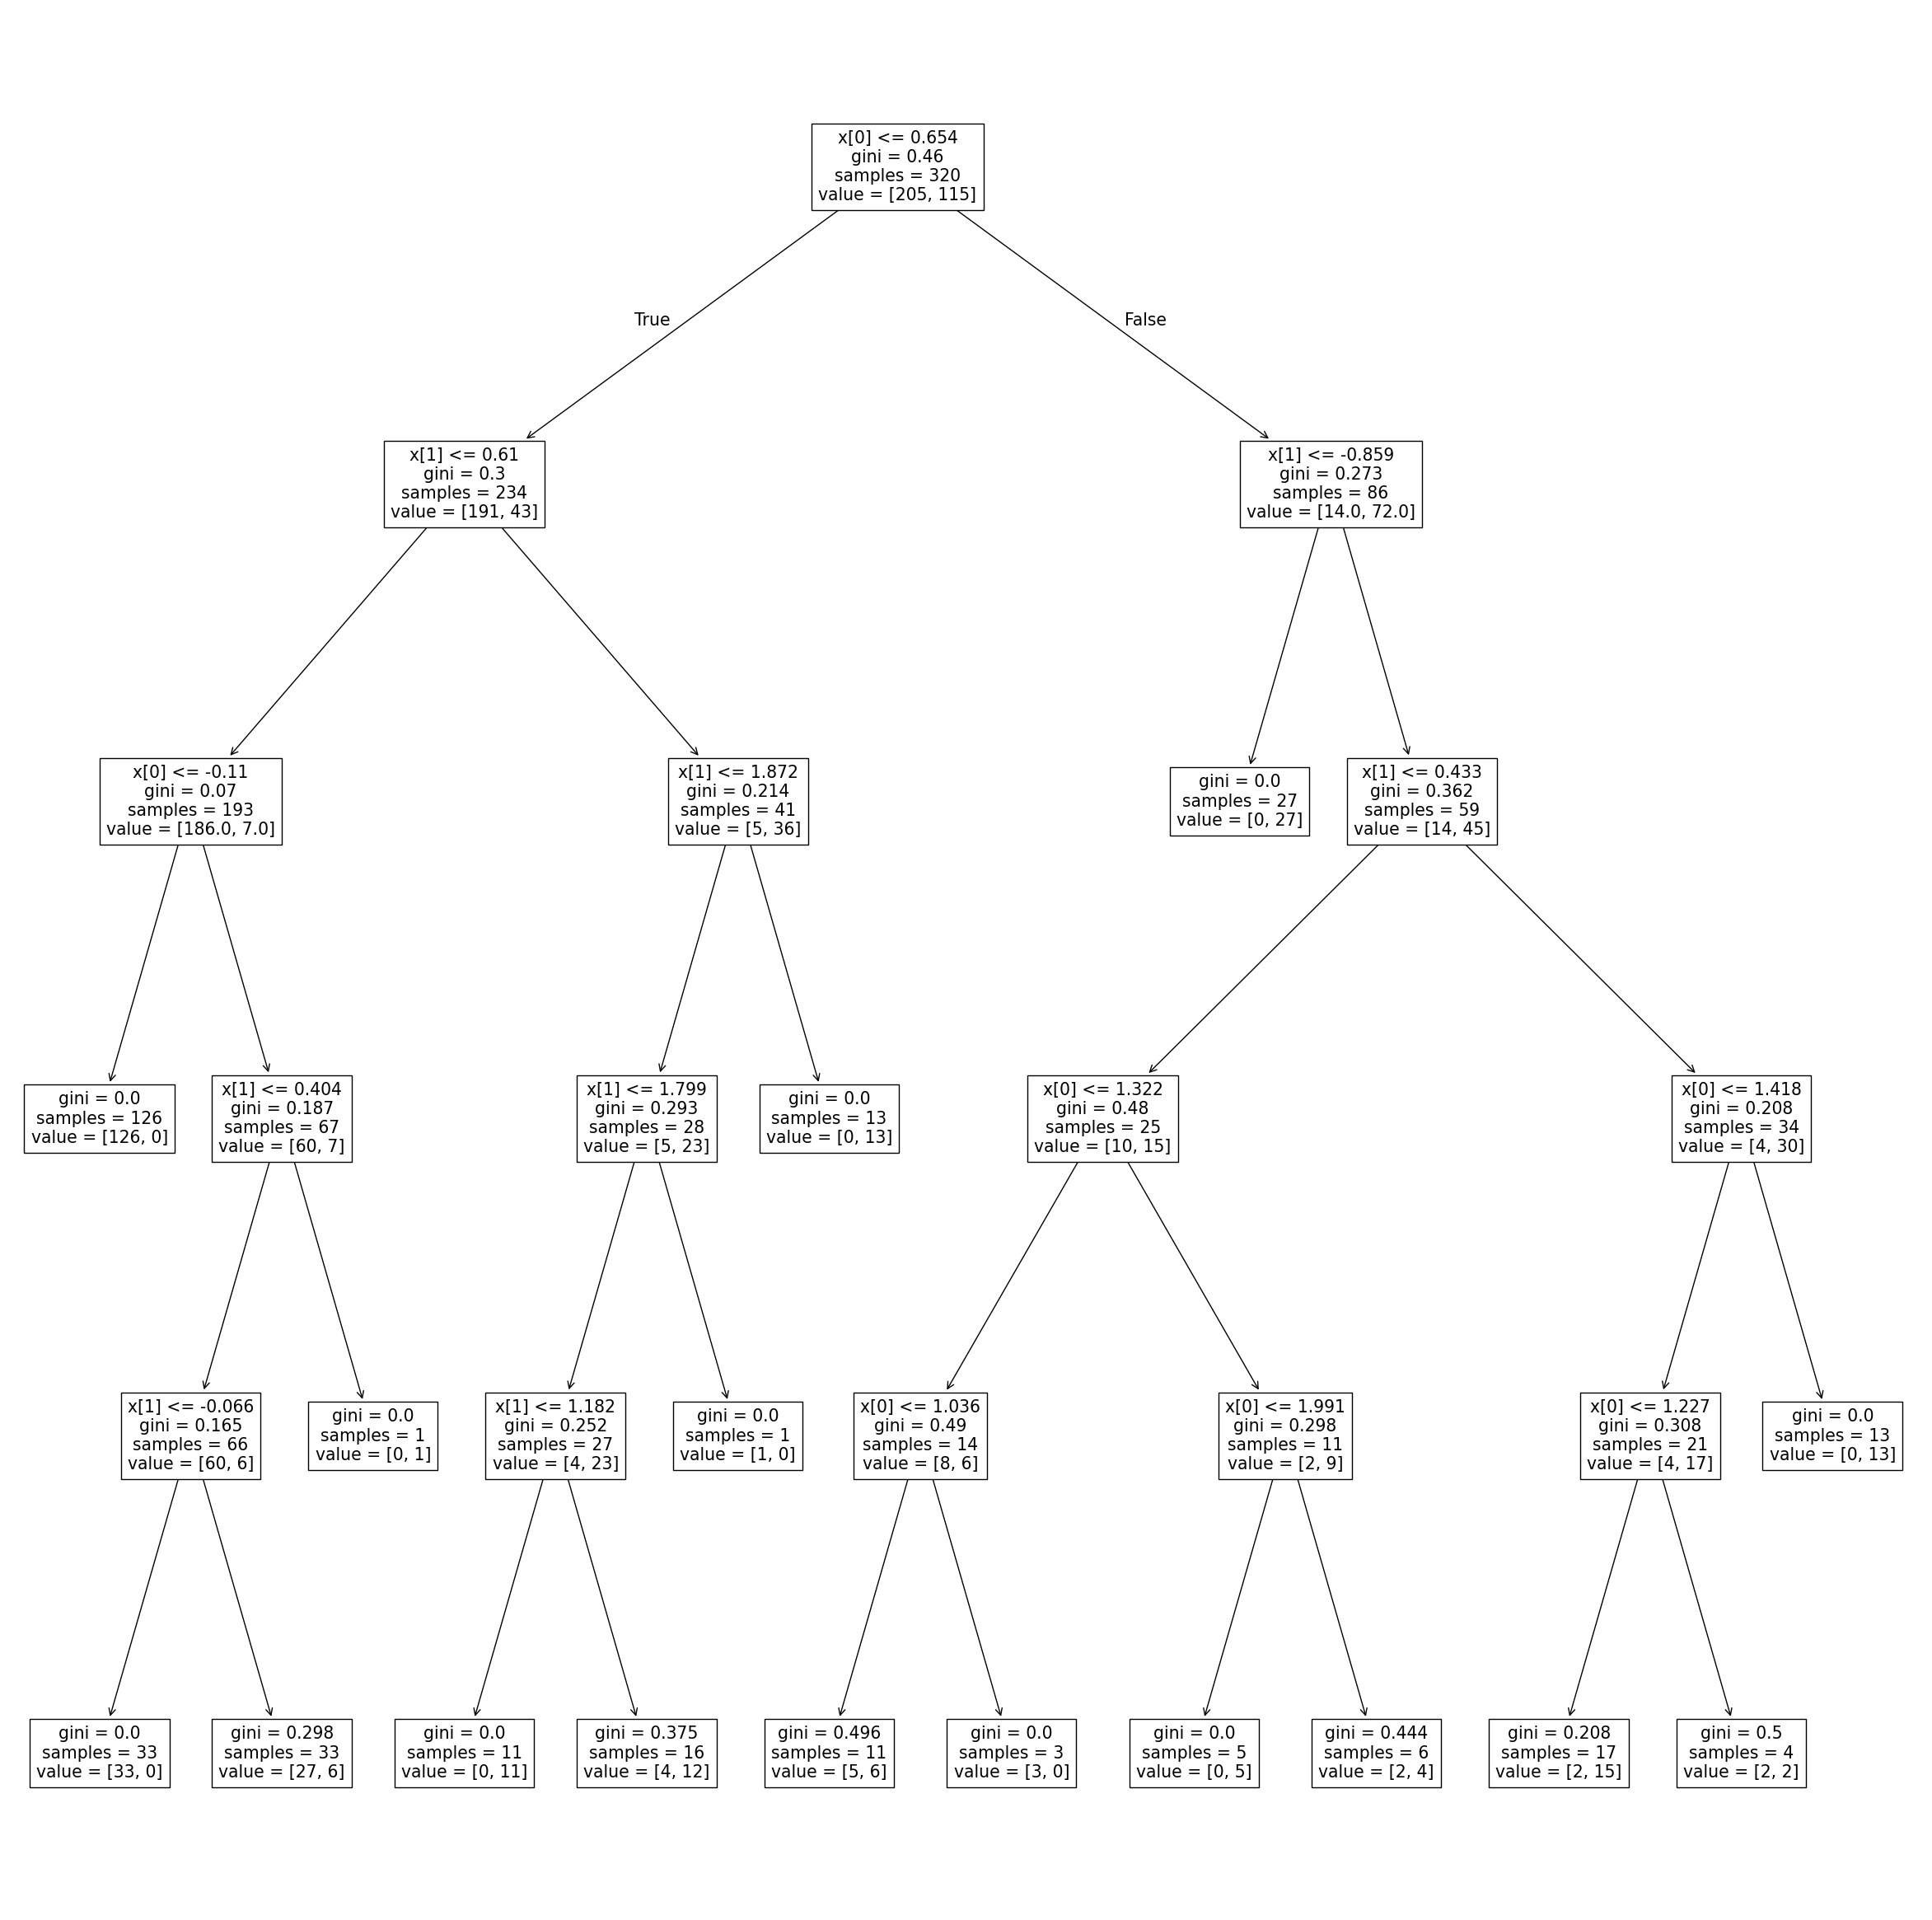

In [27]:
plt.figure(figsize=(30,30))
from sklearn.tree import plot_tree
plot_tree(dt1)
plt.show()

#POST PRUNING

In [28]:
#ISSME Hme har ek step me jaake pruning krni pdti hai,
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_test,y_test) , dt2.score(x_train,y_train))


0.9 0.821875
0.9125 0.91875
0.9125 0.91875
0.9125 0.93125
0.9 0.934375
0.8625 0.95
0.85 0.96875
0.85 0.975
0.85 0.98125
0.85 0.984375
0.8375 0.990625
0.8375 0.990625
0.8375 0.99375
0.8375 0.996875
0.8375 0.996875
0.8375 0.996875
0.8375 0.996875
0.8375 0.996875
0.8375 0.996875


In [29]:
#yhan par hme pta lag gaya ki 2 or 3 no. me train and testing data ke andr accuracy score sabse kam hai issliye , hum yhan par ussko hi choose krenge jisme sabse kam traing and testing data ke andr difference hoga

# DECISION TREES USING REGRESSION

In [30]:
datas = pd.read_csv("D:\data-analytics\multiple_linear_regression_dataset.csv")
datas.head(5)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [31]:
datas.isnull().sum()

age           0
experience    0
income        0
dtype: int64

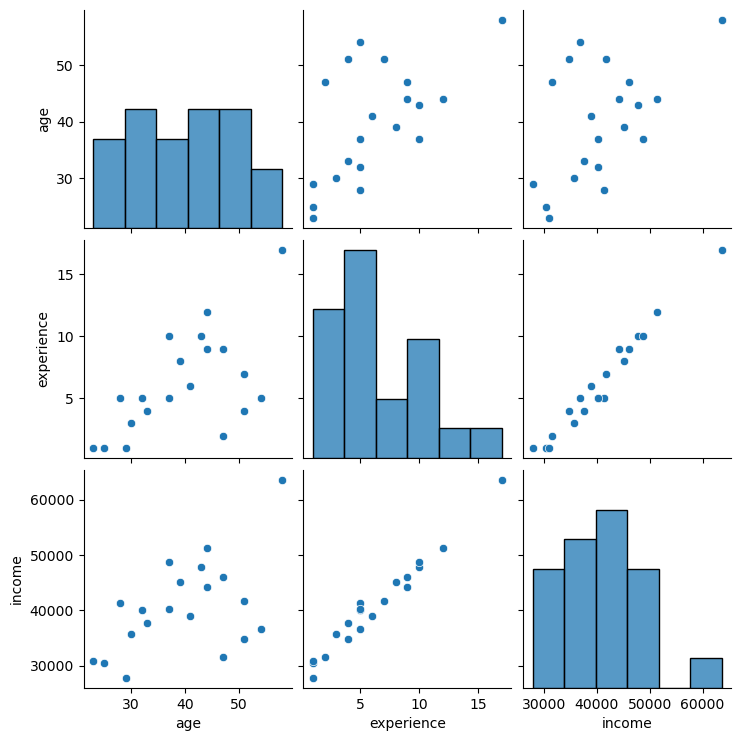

In [32]:
sns.pairplot(datas)

In [33]:
x = datas.iloc[:,:-1]
y = datas["experience"]

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train

In [34]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [35]:
dt2 = DecisionTreeRegressor()
dt2.fit(x_train,y_train)

DecisionTreeRegressor()

In [37]:
dt2.score(x_test,y_test) , dt2.score(x_train,y_train) #dono me bahut jyda hi difference mtlb isska hai ki hmara model bahut jyda hi overfitted hai , isssliye yeh sahi hai, we will use any another methods to train and test out model

(0.2857142857142858, 0.9932131495227996)

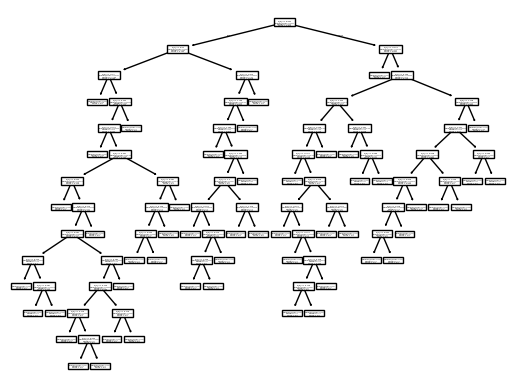

In [39]:
plot_tree(dt2)
plt.show()

In [47]:
!git init

Reinitialized existing Git repository in C:/Users/Meghana Tamrakar/.git/


In [48]:
!git remote add origin https://github.com/Meghhanaa/Data_science_tuts.git

error: remote origin already exists.


In [49]:
!git remote remove origin

In [50]:
!git remote add origin https://github.com/Meghhanaa/Data_science_tuts.git


In [51]:
!git add .

error: open("AppData/Local/AMD/DxCache/049eef7030e5b0b122345693f85461f93303fce3884dc9f7.bin"): Permission denied
error: unable to index file 'AppData/Local/AMD/DxCache/049eef7030e5b0b122345693f85461f93303fce3884dc9f7.bin'
fatal: adding files failed
